# Capstone Project 1 - Part 2 Data Visualization

### Title: Data Visualization for later Prediction of electricity rates (cost/Kwh) and consumption 
### Author: Elizabeth Izarra

### General Problem:

Electricity has a very dynamic market price since it is a commodity that is essential for daily life and non-storable where generation and demand must be continuously balanced. This is turn make it dependable of the weather conditions. 


### Data Sources:

- U.S. Energy Information Administration (EIA)
- National Oceanic and Atmospheric Administration NOAA

### Data Visualization





### -------------------------------------------------------------------------------------------------------------------------------------------------------

#### Importing relevant modules and defiing functions

In [1]:
# import the relevant modules
import requests
from pandas.io.json import json_normalize
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [2]:
#Annual and monthly mean in US
def resample_mean_US(df, f='Y'):
   
    df['date']=pd.to_datetime(df['date'], format="%Y-%m-%d")
    if f=='m': 
        df['month']=df['date'].dt.month
    df=df.set_index(['date'])
    df = df.sort_values(by=['date'],ascending=[True])
    df=df.resample(f).mean()
    if f=='m': 
        df=df.groupby(by='month').mean()
    return df


In [3]:
#get the data multi-indexed and sorted: tuple ('date', 'state') as index. Sorted by 'date'

#possible values for str_idx2: 'state' or 'iso3166'. By default state
def get_data_muti_indexed(df, str_idx2='state'):
    df['date']=pd.to_datetime(df['date'], format="%Y-%m-%d")
    df=df.set_index(['date', str_idx2])
    df = df.sort_values(by=['date','state'],ascending=[True,False])
    
    return df

#Example to slice Multi-indexed data
#Slice to get the state of Älaska from 2015-12-01 to 2017-01-01
#c.loc[(pd.IndexSlice['2015-12-01':'2017-01-01'], 'Alaska'), slice(None)]

In [4]:
#get the time series of one variable: date as index, States as columns, variable as values 

#possible values for str_idx2: 'state' or 'iso3166'. By default state
def get_variable_stateincolumns(df, str_variable, str_idx2='state'):
    #df['date']=pd.to_datetime(df['date'], format="%Y-%m-%d")
    #df=df.set_index(['date', 'state'])
    df=get_data_muti_indexed(df, str_idx2)
    df=df[str_variable]
    df=df.unstack()
    return df

In [5]:
#Resampling the existing data to get the mean annual by State
def variable_anual_mean(df, variable):
    
    #get the time series of one variable: date as index, States as columns, variable as values 
    df_c=get_variable_stateincolumns(df, variable, str_idx2='iso3166')

    
    df_variable_annual=df_c.resample('Y').mean()
    
    return df_variable_annual

In [107]:
#Plotting Variable in scatter plot to visualize data by State
def plot_scatter_variable_all_states(df, variable_y, variable_x='date', variable_size=1,title='', factor=1 ):
    #get the time series of one variable: date as index, States as columns, variable as values 
    
    #df_x=pd.DataFrame()
    #df_size=pd.DataFrame()
    print(variable_y, variable_x, variable_size)
    
    df_y=get_variable_stateincolumns(df, variable_y)
    
    if variable_x!='date': df_x=get_variable_stateincolumns(df, variable_x)
    if variable_size!=1: df_size=get_variable_stateincolumns(df, variable_size)   
       
    i=1
    for state in df_y.columns:
        if variable_x!='date': x=df_x[state].mean()
        else: x=df_x.index.values
        
        y=df_y[state].mean()
        
        if variable_size!=1: size=df_size[state].mean()/factor
        else: size=1
        
        #Format the size of the figure/plot
        width=12
        height=4.8
        plt.rcParams['figure.figsize'] = [width, height]

        plt.scatter(x=x, y=y, label=state, s=size)
        
        plt.xlabel(variable_x)
        plt.ylabel(variable_y)
        plt.title(title)
        plt.legend(title=variable_size, bbox_to_anchor=(0, -0.15, 1, 0), loc='best', ncol=5, mode="expand")
        if variable_x=='date': plt.xlim('2001-01-01', '2018-12-31')
        plt.yscale('log')
        
        i+=i
        
    plt.show()
    plt.clf()
    plt.rcdefaults() #restore plot default values

In [8]:
#Plotting Variable in line plot to visualize data by State
def plot_variable_all_states(df,variable):

    #get the time series of one variable: date as index, States as columns, variable as values 
    c=get_variable_stateincolumns(df, variable)

    #Format the size of the figure/plot
    width=12
    height=4.8
    plt.rcParams['figure.figsize'] = [width, height]
    plt.rcParams['lines.linewidth'] = 1
    
    #Plotting variable for all states 
    c.plot()
    plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc='best', ncol=5, mode="expand", borderaxespad=0)
    plt.xlabel('date')
    plt.title(variable+'- All States')
    plt.xlim('2001-01-01', '2018-12-31')
    plt.yscale('log')
    
    
    
    plt.show()
    plt.clf()
    plt.rcdefaults() #restore plot default values

### Getting Data retrieved in Project_Part1: Data acquisition and data wrangling

In [81]:
#Getting Data retrieved in Project_Part1
file='AllData_2.csv'
df_data_orig=pd.read_csv(file)
df_data=df_data_orig.copy()
#delete any unnamed column product of saving DataFrames in range index to csv
df_data.drop(df_data.columns[df_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df_data.head()

#getting US regions
file='regions.csv'
df_reg_orig=pd.read_csv(file)
df_reg=df_reg_orig.copy()

In [82]:
df=df_data.copy()
df_monthly_US=resample_mean_US(df,f='m')
df_annual_US=resample_mean_US(df,f='Y')

In [83]:
df_monthly_US

,Net generation,Retail sales of electricity,Revenue from retail sales of electricity,Average retail price of electricity,Number of customer accounts,TAVG,TMAX,TMIN
month,,,,,,,,
1,6867.686461,6251.440445,557.730145,9.211525,2.877022e+06,31.392838,41.128203,21.662249
2,6049.681665,5673.276941,510.596302,9.308431,2.869797e+06,33.744849,44.102961,23.396023
3,6179.699916,5641.662310,507.834599,9.292146,2.890110e+06,42.133358,53.204746,31.071243
4,5768.713247,5273.898643,472.332248,9.260414,2.881904e+06,51.661994,63.474830,39.859405
5,6308.896131,5567.440782,509.685878,9.429717,2.887993e+06,60.851740,72.469639,49.240830
6,7008.097734,6240.591268,601.867383,9.822680,2.891565e+06,69.286437,80.724410,57.855436
7,7761.619021,6953.480878,686.674162,9.985098,2.893262e+06,73.809951,85.239305,62.384951
8,7706.911274,7015.542445,690.934274,9.959107,2.897254e+06,72.432279,83.886386,60.983612
9,6637.989033,6302.352767,608.768778,9.805686,2.891028e+06,65.843136,77.480306,54.207685


In [84]:
df_annual_US.head()

,Net generation,Retail sales of electricity,Revenue from retail sales of electricity,Average retail price of electricity,Number of customer accounts,TAVG,TMAX,TMIN,month
date,,,,,,,,,
2001-12-31,6105.626879,5546.500170,404.155384,7.236895,2.575671e+06,53.049644,64.381134,41.730052,6.5
2002-12-31,6304.663899,5662.526162,407.533515,7.130033,2.620079e+06,52.931653,64.126754,41.745815,6.5
2003-12-31,6345.073848,5708.716480,424.455642,7.334641,2.638124e+06,52.213522,63.167090,41.278510,6.5
2004-12-31,6487.835398,5796.535103,441.371285,7.546536,2.669003e+06,52.481659,63.253226,41.724844,6.5
2005-12-31,6626.507761,5981.974694,486.932714,8.085539,2.713082e+06,52.978175,64.011430,41.955891,6.5


In [85]:
df_reg

,New England,Middle Atlantic,East North Central,West North Central,South Atlantic,East South Central,West South Central,Pacific Contiguous
0,Connecticut,New Jersey,Illinois,Iowa,Delaware,Alabama,Arkansas,California
1,Maine,New York,Indiana,Kansas,District of Columbia,Kentucky,Louisiana,Oregon
2,Massachusetts,Pennsylvania,Michigan,Minnesota,Florida,Mississippi,Oklahoma,Washington
3,New Hampshire,NaN,Ohio,Missouri,Georgia,Tennessee,Texas,Pacific Noncontiguous
4,Rhode Island,NaN,Wisconsin,Nebraska,Maryland,NaN,Mountain,Alaska
5,Vermont,NaN,NaN,North Dakota,North Carolina,NaN,Arizona,Hawaii
6,NaN,NaN,NaN,South Dakota,South Carolina,NaN,Colorado,NaN
7,NaN,NaN,NaN,NaN,Virginia,NaN,Idaho,NaN
8,NaN,NaN,NaN,NaN,West Virginia,NaN,Montana,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,Nevada,NaN


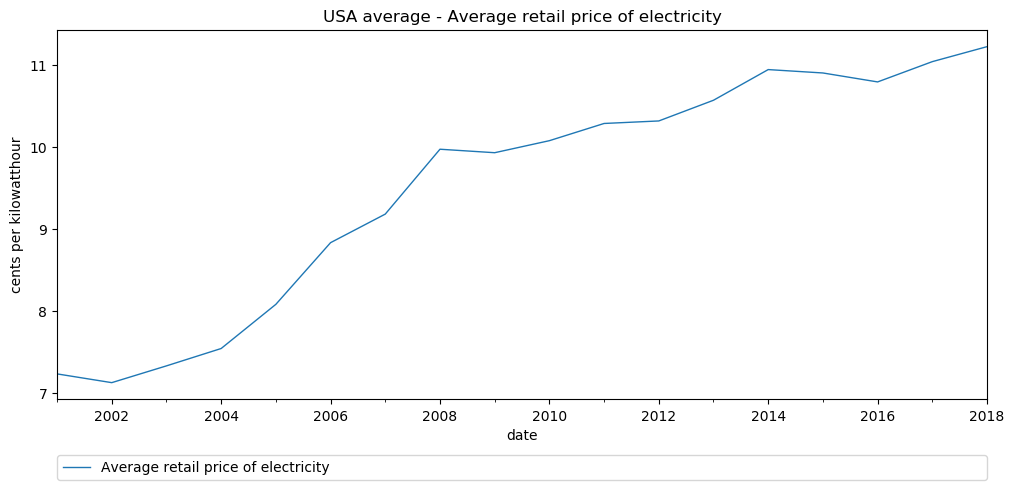

<Figure size 1200x480 with 0 Axes>

In [86]:

Variables='Average retail price of electricity'
c=df_annual_US
title_graph='USA average - Average retail price of electricity'
label_x='date'
label_y='cents per kilowatthour'


#Format the size of the figure/plot
width=12
height=4.8
plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams['lines.linewidth'] = 1
    
#Plotting "Number of customer account" for the state of 'Alaska' together with two others similar account size to visualize missing data
c.loc[slice(None),Variables].plot()

plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc='best', ncol=5, mode="expand", borderaxespad=0)
plt.xlabel(label_x)
plt.ylabel(label_y)
plt.title(title_graph)
plt.xlim('2001-01-01', '2018-12-31')
#plt.yscale('log')
    
    
    
plt.show()
plt.clf()
plt.rcdefaults() #restore plot default values

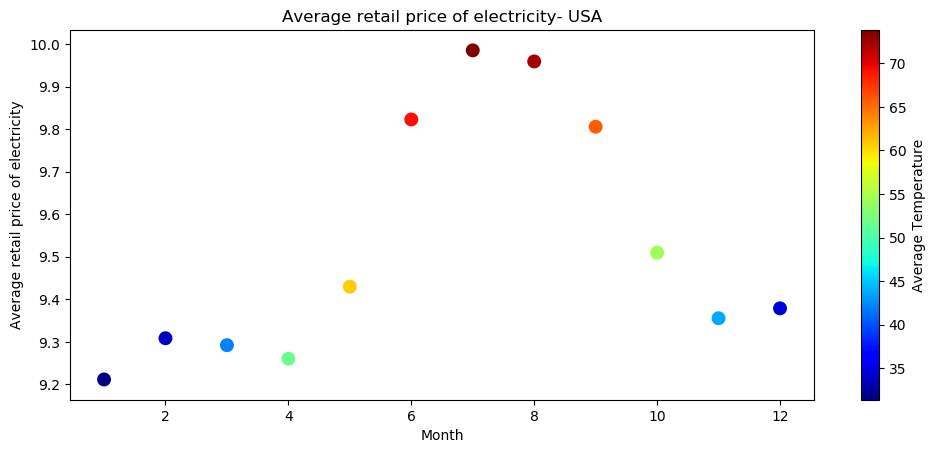

In [87]:
# Electricity Price in USA with respect to average temperature by month
df_monthly_US=resample_mean_US(df_data,f='m')

variable_y='Average retail price of electricity'
variable_x='Month'
title_graph='USA average - Retail price of electricity Vs Temperature'
label_x='Month'
label_y='cents per kilowatthour'
variable_color='TAVG'

#x=df_monthly_US[variable_x]
v_x=df_monthly_US.index
v_y=df_monthly_US[variable_y]
v_z=df_monthly_US[variable_color]

#Format the size of the figure/plot
width=12
height=4.8
plt.rcParams['figure.figsize'] = [width, height]

plt.scatter(x=v_x, y=v_y, c=v_z, cmap='jet', linewidth=4)
        
plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.title(variable_y+'- USA')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Average Temperature', rotation=90)

#plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc='best', ncol=5, mode="expand")

#plt.xlim('2001-01-01', '2018-12-31')
#plt.yscale('log')
plt.show()

Average retail price of electricity Number of customer accounts Net generation


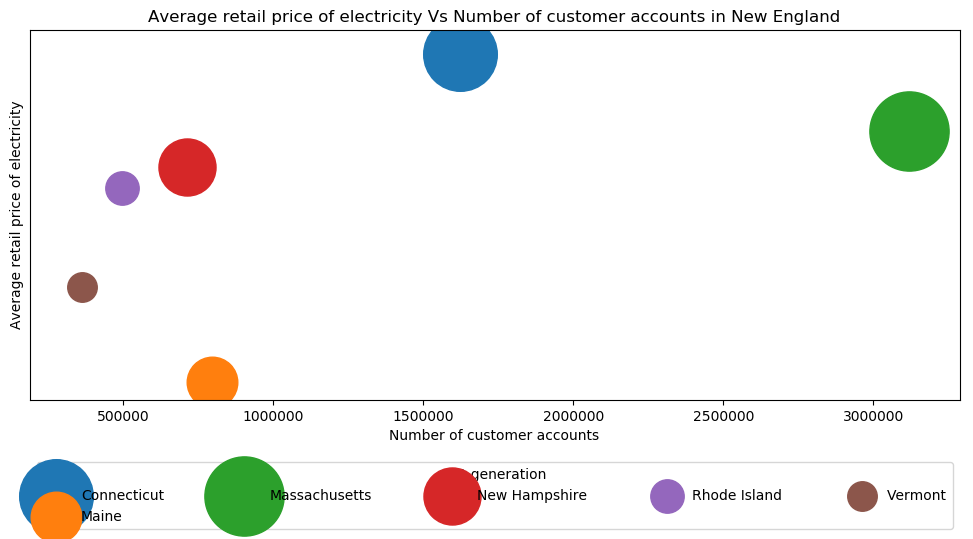

Average retail price of electricity Number of customer accounts Net generation


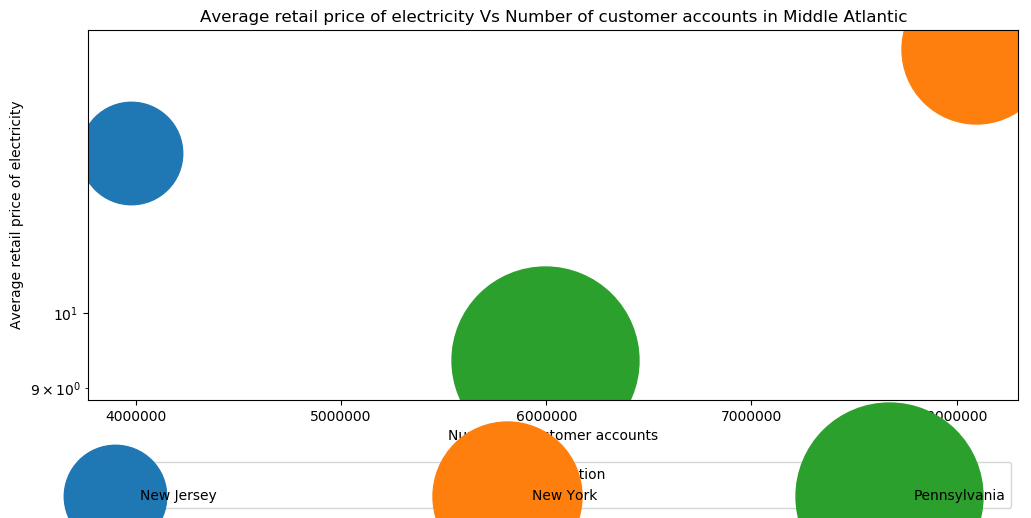

Average retail price of electricity Number of customer accounts Net generation


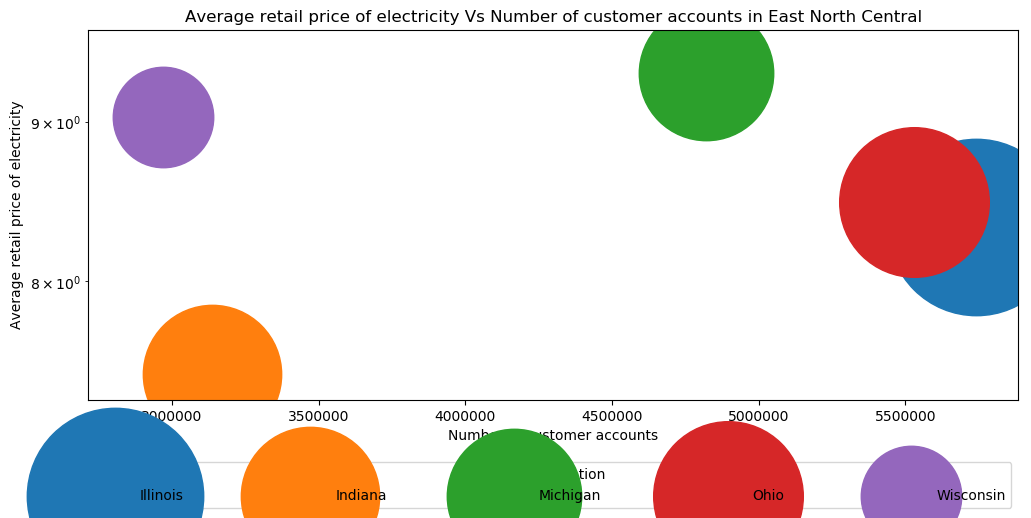

Average retail price of electricity Number of customer accounts Net generation


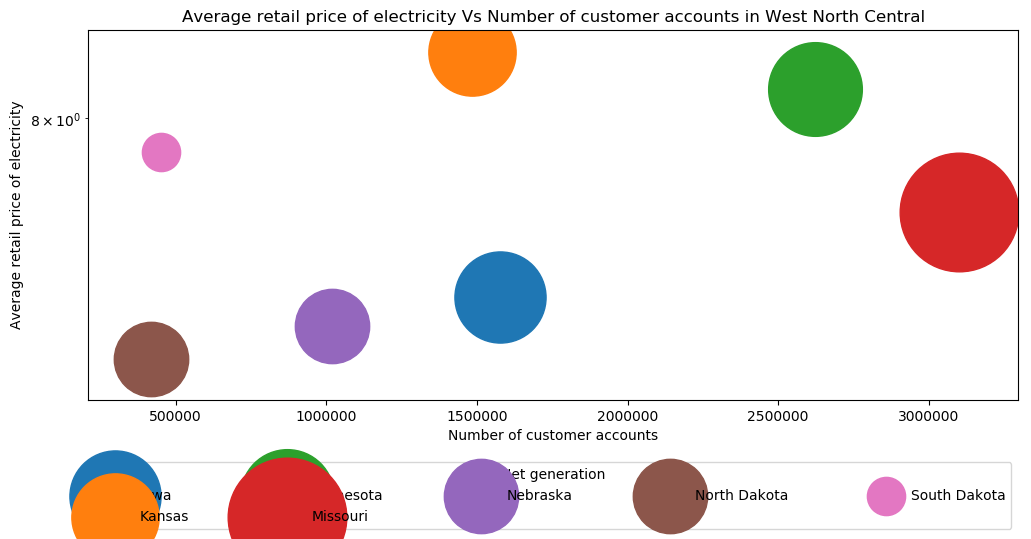

Average retail price of electricity Number of customer accounts Net generation


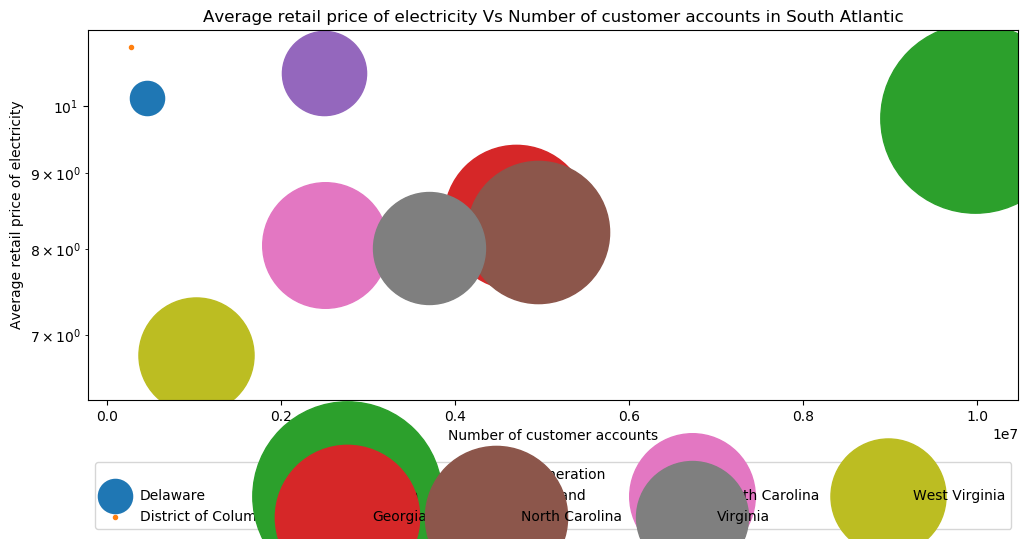

Average retail price of electricity Number of customer accounts Net generation


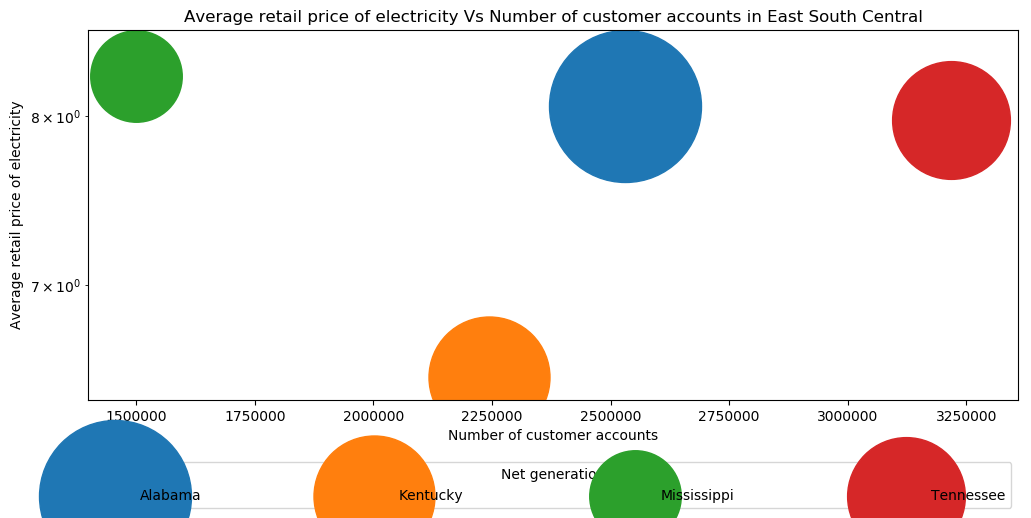

Average retail price of electricity Number of customer accounts Net generation


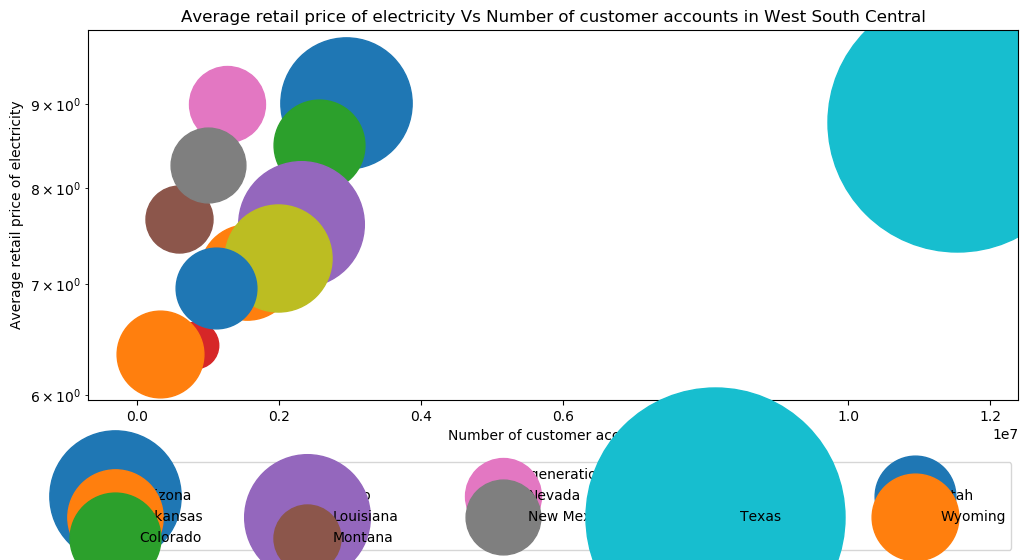

Average retail price of electricity Number of customer accounts Net generation


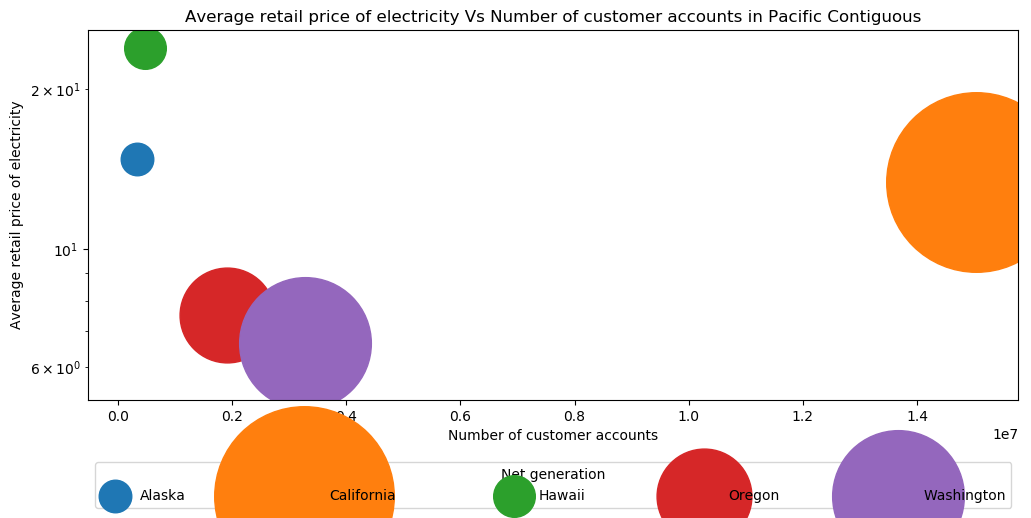

<Figure size 1200x480 with 0 Axes>

In [108]:
#Net Number of Customers Vs Average price of electricity in the regions


for reg in df_reg.columns:
    #getting the data for th e states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)


    variable_y='Average retail price of electricity'
    variable_x='Number of customer accounts'
    variable_size='Net generation'
    v_title=variable_y+' Vs ' +variable_x+' in '+reg

    idx_region=df_data.index[df_data['state'].isin(list_states)]
    df=df_data.loc[idx_region, slice(None)]

    plot_scatter_variable_all_states(df,variable_y, variable_x=variable_x, variable_size=variable_size, title=v_title, factor=1)

Average retail price of electricity Net generation Number of customer accounts


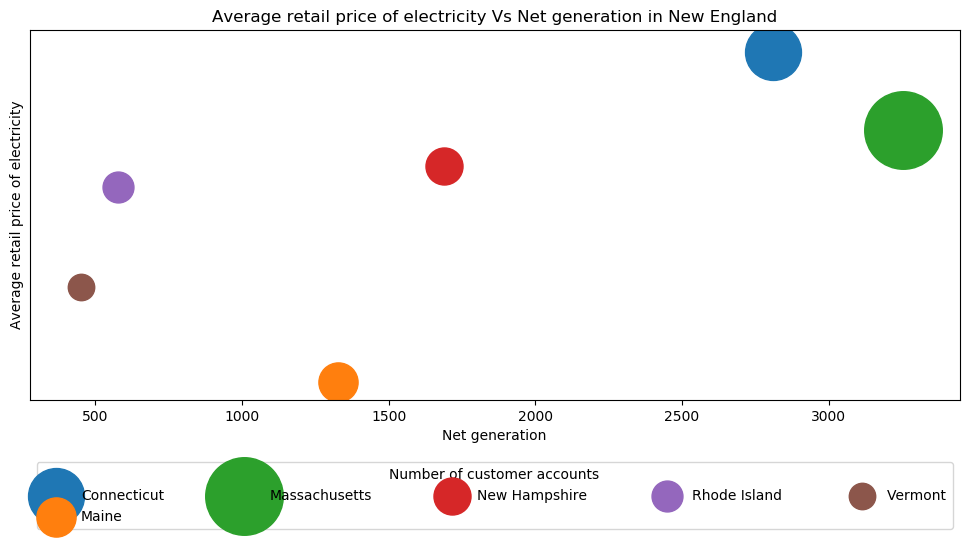

Average retail price of electricity Net generation Number of customer accounts


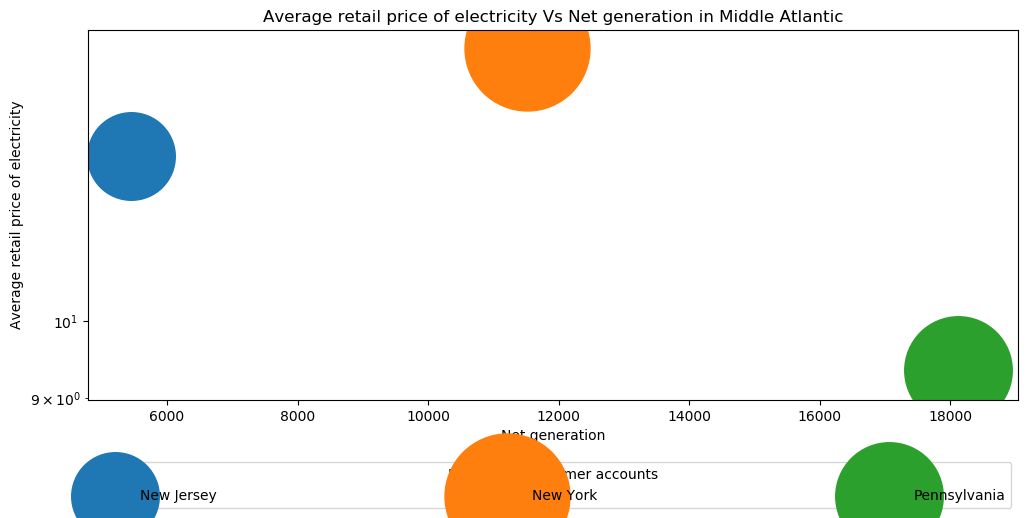

Average retail price of electricity Net generation Number of customer accounts


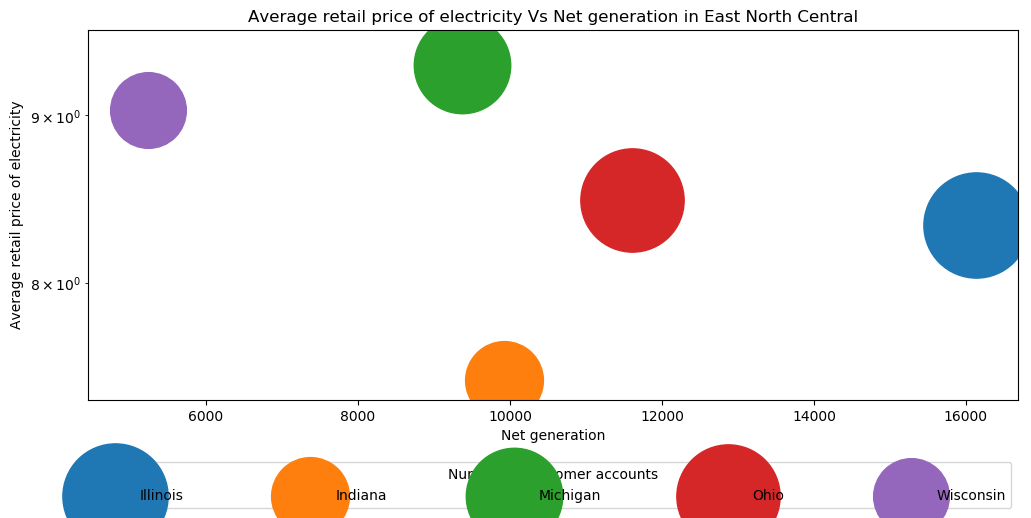

Average retail price of electricity Net generation Number of customer accounts


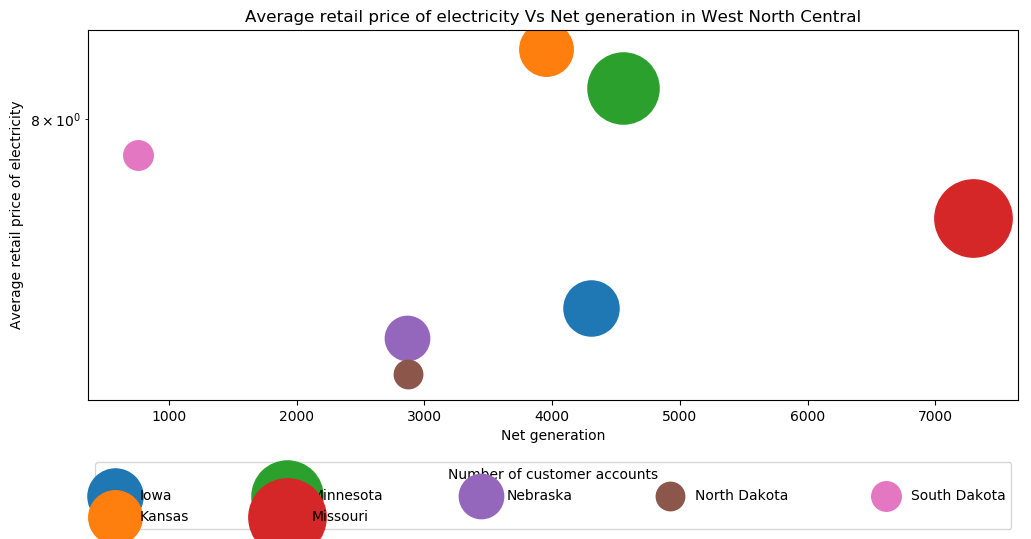

Average retail price of electricity Net generation Number of customer accounts


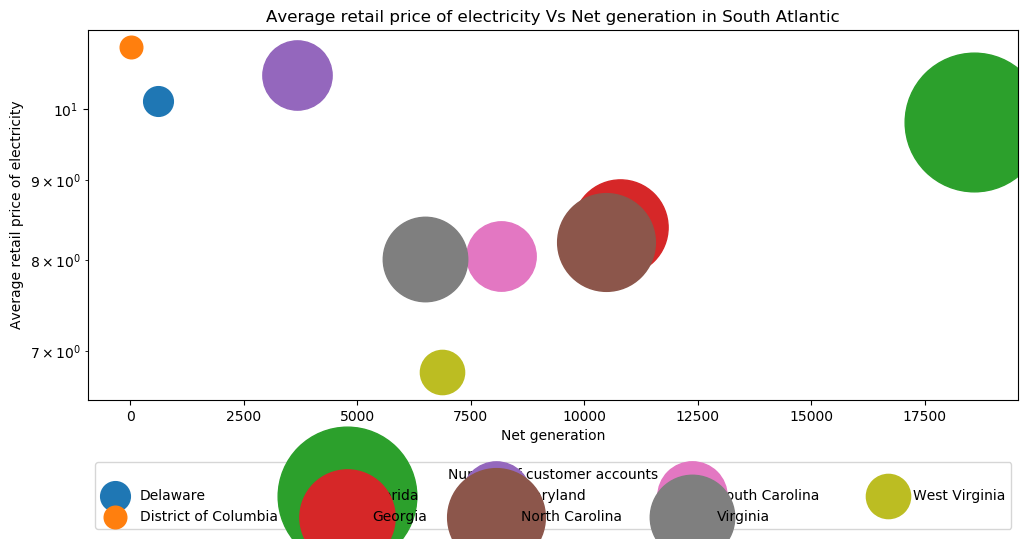

Average retail price of electricity Net generation Number of customer accounts


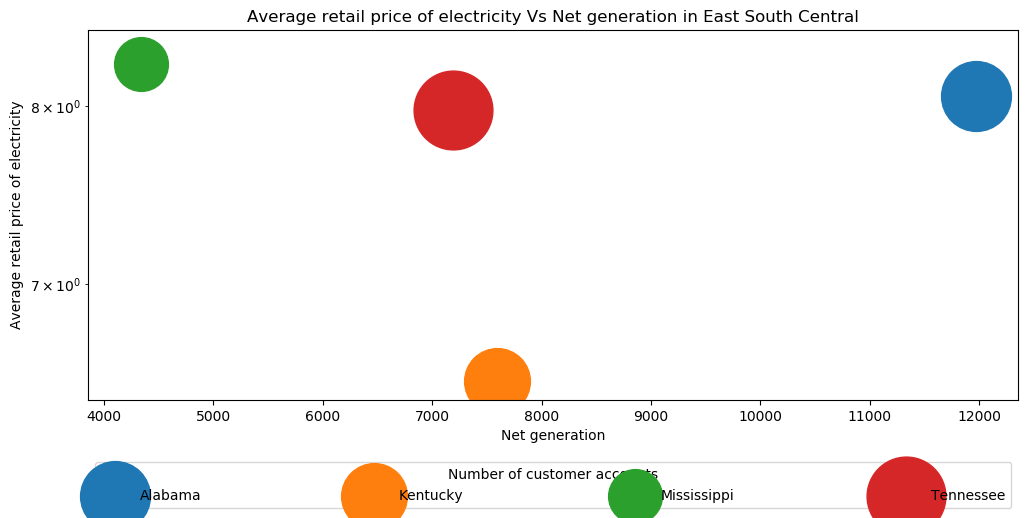

Average retail price of electricity Net generation Number of customer accounts


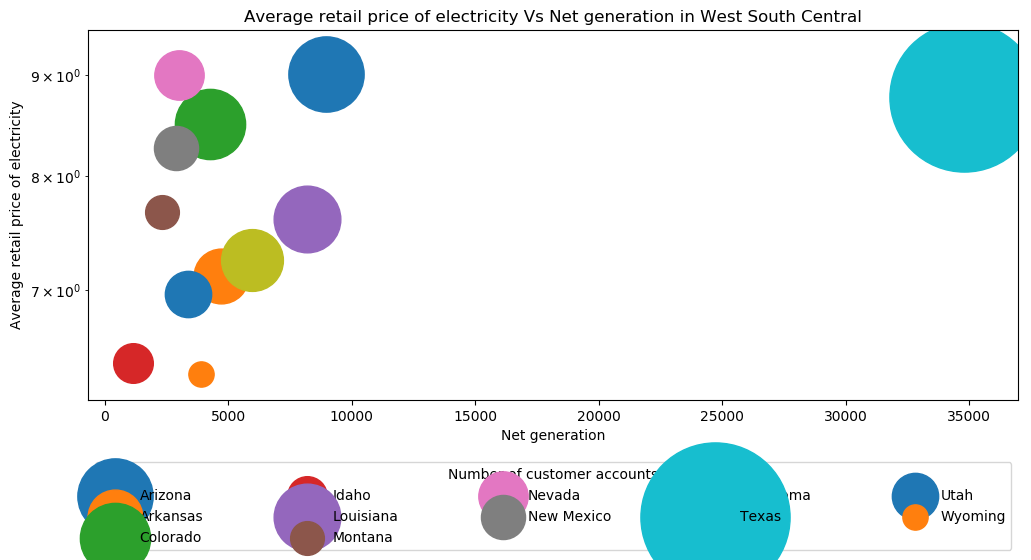

Average retail price of electricity Net generation Number of customer accounts


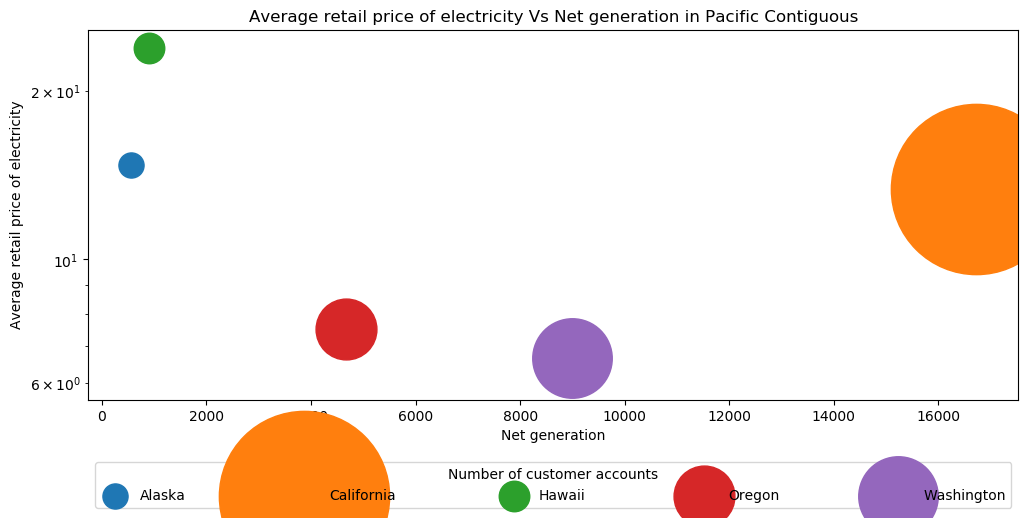

<Figure size 1200x480 with 0 Axes>

In [109]:
#Net Number of Customers Vs Average price of electricity in the regions


for reg in df_reg.columns:
    #getting the data for th e states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)


    variable_y='Average retail price of electricity'
    variable_size='Number of customer accounts'
    variable_x='Net generation'
    v_title=variable_y+' Vs ' +variable_x+' in '+reg

    idx_region=df_data.index[df_data['state'].isin(list_states)]
    df=df_data.loc[idx_region, slice(None)]

    plot_scatter_variable_all_states(df,variable_y, variable_x=variable_x, variable_size=variable_size, title=v_title, factor=1000)